# Exercise 1: XOR gate and neural networks

### by: Ahad Beykaei

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

# Import Data as DataFrame using pandas

In [3]:
df = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")

## Preparing training data

### Divide data into 4 categories based on A and B

In [4]:
df00 = df[(df.A == 0) & (df.B == 0)]
df01 = df[(df.A == 0) & (df.B == 1)]
df10 = df[(df.A == 1) & (df.B == 0)]
df11 = df[(df.A == 1) & (df.B == 1)]

df00.head()

,A,B,t,y
5,0.0,0.0,0.6418,19.304998
6,0.0,0.0,0.4004,14.344102
7,0.0,0.0,0.5337,17.503541
8,0.0,0.0,0.7683,16.905358
13,0.0,0.0,0.7454,17.849028


## Preparing testing Data

In [5]:
df00_test = df_test[(df_test.A == 0) & (df_test.B == 0)]
df01_test = df_test[(df_test.A == 0) & (df_test.B == 1)]
df10_test = df_test[(df_test.A == 1) & (df_test.B == 0)]
df11_test = df_test[(df_test.A == 1) & (df_test.B == 1)]

df00_test.head()

,A,B,t,y
3,0.0,0.0,0.5444,18.291723
9,0.0,0.0,0.2734,14.886029
14,0.0,0.0,0.5432,18.181929
15,0.0,0.0,0.2359,14.634929
16,0.0,0.0,0.8129,15.147548


# Scatter Plot

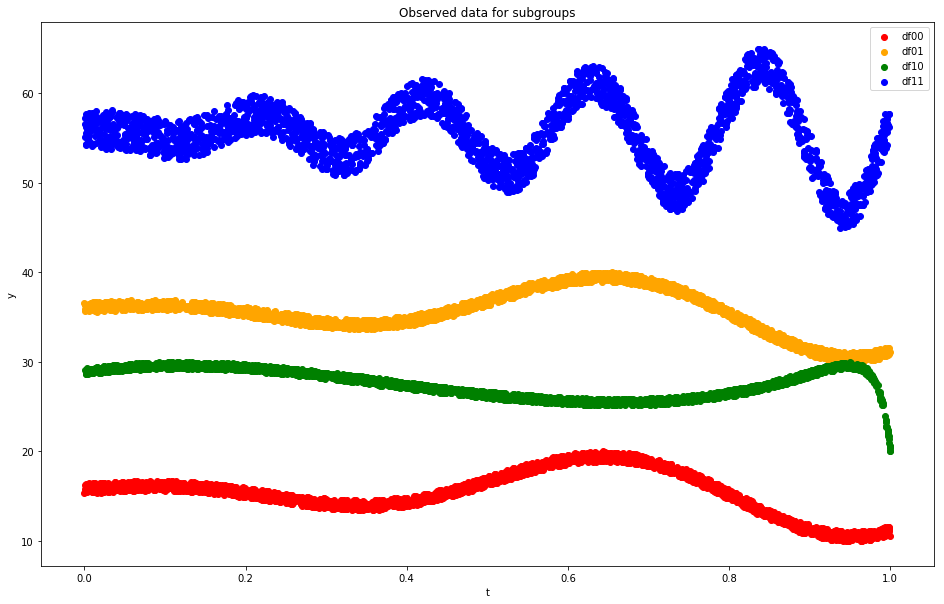

In [40]:
plt.figure(figsize=(16, 10))
plt.scatter(df00['t'], df00['y'], color="red")
plt.scatter(df01['t'], df01['y'], color="orange")
plt.scatter(df10['t'], df10['y'], color="green")
plt.scatter(df11['t'], df11['y'], color="blue")
plt.legend(['df00', 'df01', 'df10', 'df11'], loc=1)
plt.title('Observed data for subgroups')
plt.ylabel('y')
plt.xlabel('t')
plt.show()

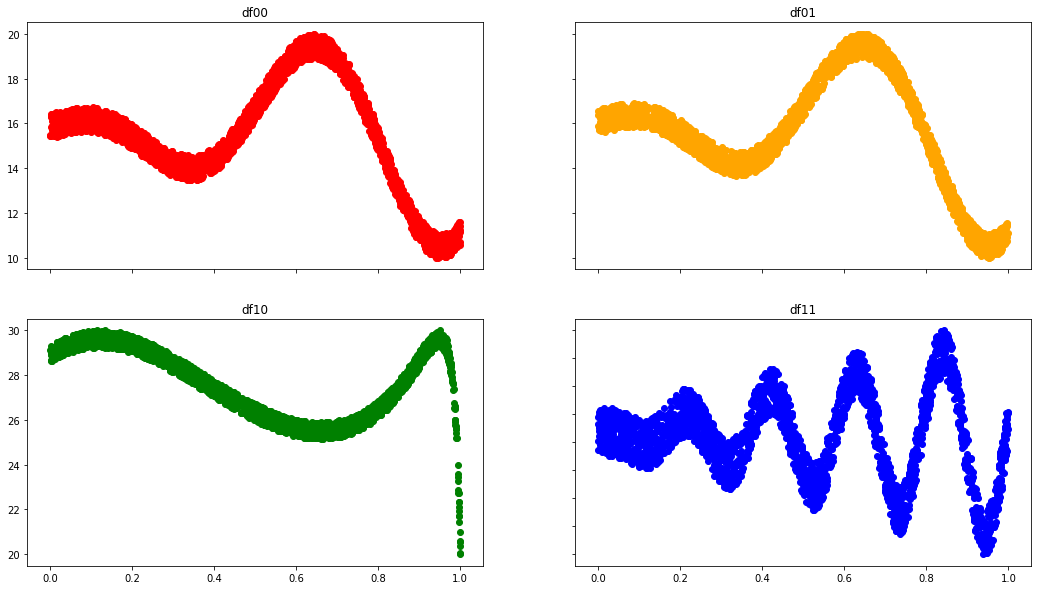

In [7]:
f, axarr = plt.subplots(2, 2, figsize=(18, 10))
axarr[0, 0].scatter(df00['t'], df00['y'], color="red")
axarr[0, 0].set_title('df00')
axarr[0, 1].scatter(df01['t'], df01['y'], color="orange")
axarr[0, 1].set_title('df01')
axarr[1, 0].scatter(df10['t'], df10['y'], color="green")
axarr[1, 0].set_title('df10')
axarr[1, 1].scatter(df11['t'], df11['y'], color="blue")
axarr[1, 1].set_title('df11')
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.show()

## Find corrolations between t and y in different group

In [8]:
print(np.corrcoef(df00['t'], df00['y']))
print(np.corrcoef(df01['t'], df01['y']))
print(np.corrcoef(df10['t'], df10['y']))
print(np.corrcoef(df11['t'], df11['y']))

[[ 1.         -0.26903414]
 [-0.26903414  1.        ]]
[[ 1.         -0.28498991]
 [-0.28498991  1.        ]]
[[ 1.         -0.52884472]
 [-0.52884472  1.        ]]
[[ 1.         -0.13820343]
 [-0.13820343  1.        ]]


# Plot Histigram

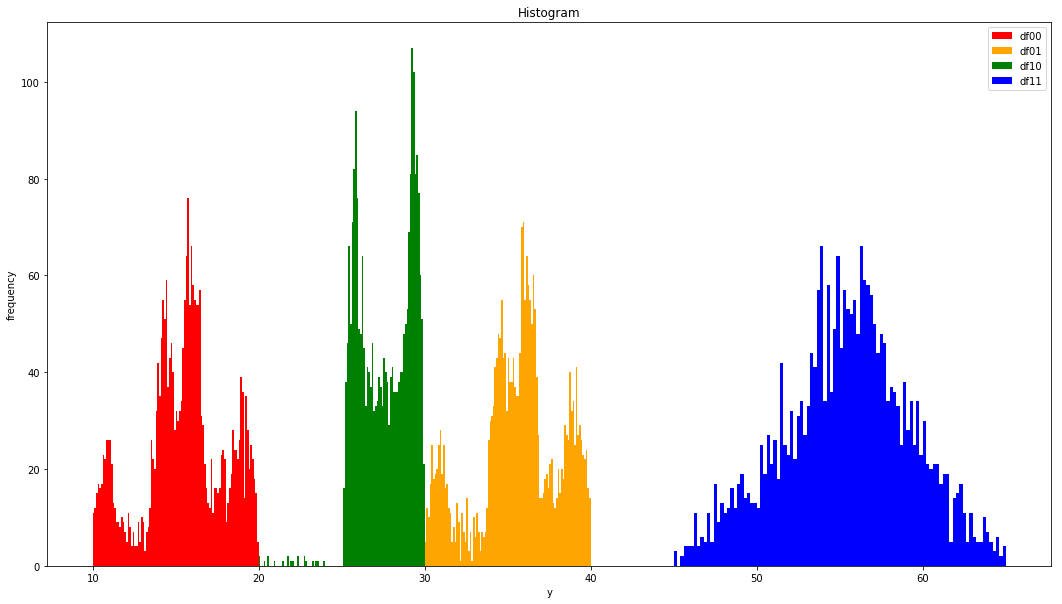

In [36]:
plt.figure(figsize=(18, 10))
plt.hist(df00['y'], 100, color="red")
plt.hist(df01['y'], 100, color="orange")
plt.hist(df10['y'], 100, color="green")
plt.hist(df11['y'], 100, color="blue")
plt.legend(['df00', 'df01', 'df10', 'df11'], loc=1)
plt.title('Histogram')
plt.ylabel('frequency')
plt.xlabel('y')
plt.show()

# Different statistical parameters

In [10]:
print("std00 = " + str(df00.y.std()))
print("median00 = " + str(df00.y.median()))
print("mean00 = " + str(df00.y.mean()) + '\n')

print("std01 = " + str(df01.y.std()))
print("median01 = " + str(df01.y.median()))
print("mean01 = " + str(df01.y.mean()) + '\n')

print("std10 = " + str(df10.y.std()))
print("median10 = " + str(df10.y.median()))
print("mean10 = " + str(df10.y.mean()) + '\n')

print("std11 = " + str(df11.y.std()))
print("median11 = " + str(df11.y.median()))
print("mean11 = " + str(df11.y.mean()))

std00 = 2.44811554815
median00 = 15.627951858649508
mean00 = 15.449160527

std01 = 2.47841461175
median01 = 35.852584157943475
mean01 = 35.6282930923

std10 = 1.58736763857
median10 = 27.711187243129288
mean10 = 27.6150064897

std11 = 3.87621537258
median11 = 55.54834414473799
mean11 = 55.3857044661


# Develop MLP Nueral Network

## Create model

In [14]:
model = Sequential()
model.add(Dense(25, input_dim=3, activation='relu'))  # or input_shape=(3,) | we have 3 features to predict the output
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, kernel_initializer='normal')) # our last layer has one neuron, because the output is not categorical but it is numerical

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 2,076
Trainable params: 2,076
Non-trainable params: 0
_________________________________________________________________


In [24]:
# For a mean squared error regression problem (the output is numerical not categorical)
model.compile(loss='mean_squared_error', optimizer='adam')

labels = df['y'].values
x = df[['A', 'B', 't']].values

# Train the model, iterating on the data in batches of 10 samples
model_fitted = model.fit(x, labels, epochs=150, batch_size=10)

Epoch 1/150
10000/10000 [==============================] - 2s - loss: 2.3849     
Epoch 2/150
10000/10000 [==============================] - 2s - loss: 2.2952     
Epoch 3/150
10000/10000 [==============================] - 2s - loss: 2.3114     
Epoch 4/150
10000/10000 [==============================] - 2s - loss: 2.3368     
Epoch 5/150
10000/10000 [==============================] - 2s - loss: 2.3143     
Epoch 6/150
10000/10000 [==============================] - 2s - loss: 2.3039     
Epoch 7/150
10000/10000 [==============================] - 2s - loss: 2.3683     
Epoch 8/150
10000/10000 [==============================] - 2s - loss: 2.2789     
Epoch 9/150
10000/10000 [==============================] - 2s - loss: 2.2494     
Epoch 10/150
10000/10000 [==============================] - 2s - loss: 2.2376     
Epoch 11/150
10000/10000 [==============================] - 2s - loss: 2.2702     
Epoch 12/150
10000/10000 [==============================] - 2s - loss: 2.2993     
Epoch 13/150


## Evaluate the model

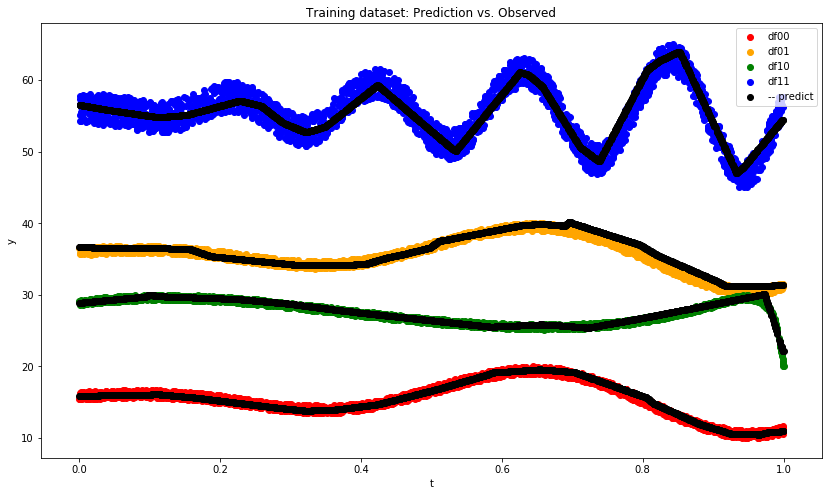

In [43]:
y_predict = model.predict(x)

plt.figure(figsize=(14, 8))
plt.scatter(df00['t'], df00['y'], color="red")
plt.scatter(df01['t'], df01['y'], color="orange")
plt.scatter(df10['t'], df10['y'], color="green")
plt.scatter(df11['t'], df11['y'], color="blue")

plt.scatter(df['t'], y_predict, color="black")
plt.title('Training dataset: Prediction vs. Observed')
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['df00', 'df01', 'df10', 'df11', '-- predict'], loc=1)
plt.show()

## Test the model

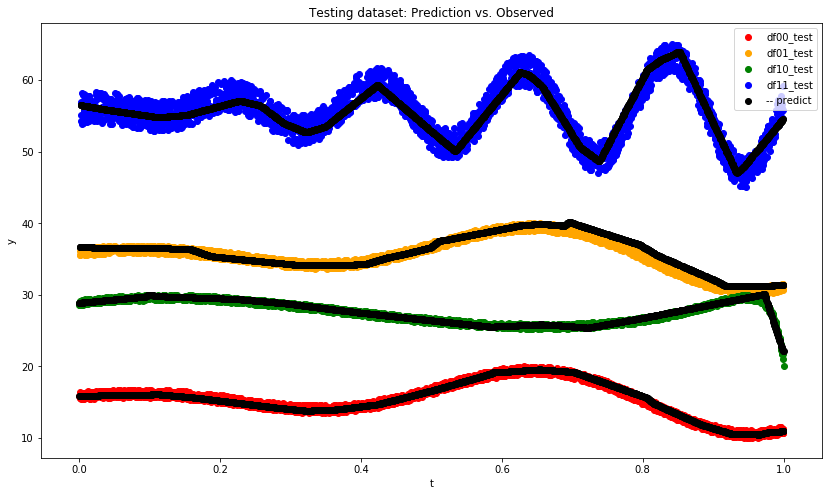

In [44]:
x_test = df_test[['A', 'B', 't']].values
y_predict_test = model.predict(x_test)

plt.figure(figsize=(14, 8))
plt.scatter(df00_test['t'], df00_test['y'], color="red")
plt.scatter(df01_test['t'], df01_test['y'], color="orange")
plt.scatter(df10_test['t'], df10_test['y'], color="green")
plt.scatter(df11_test['t'], df11_test['y'], color="blue")

plt.scatter(df_test['t'], y_predict_test, color="Black")
plt.title('Testing dataset: Prediction vs. Observed')
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['df00_test', 'df01_test', 'df10_test', 'df11_test', '-- predict'], loc=1)
plt.show()

## Summarize history for loss

In [27]:
print(model_fitted.history.keys())

dict_keys(['loss'])


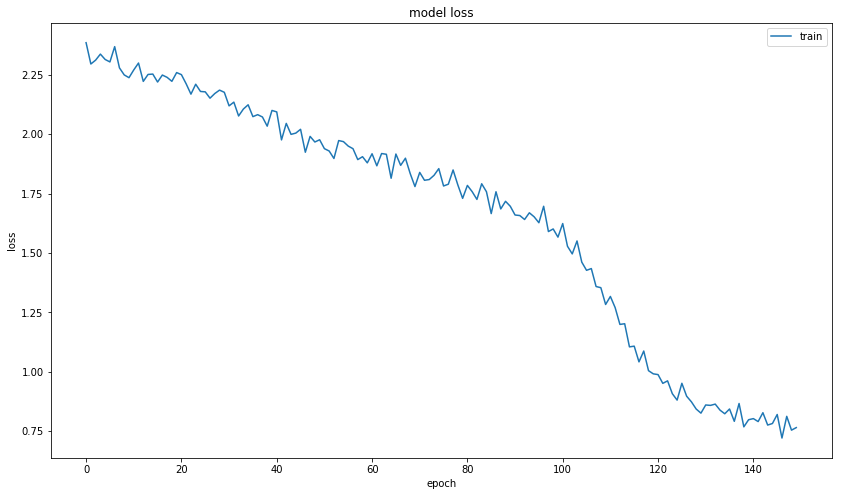

In [42]:
plt.figure(figsize=(14, 8))
plt.plot(model_fitted.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## Calculate mean square error of testing data

In [50]:
def mse_test(y_test, y_predict):
    se = 0
    i=0
    for item in y_predict:
        se += (item - y_test[i])**2
        i +=1
    return se / i
        
print("MSE for test: " + str(mse_test(df_test['y'].values, y_predict_test)))

MSE for test: [ 0.72192293]


## MLP Model evaluation with more input attributes

In [53]:
C = np.random.randint(2, size=10000)
D = np.random.randint(2, size=10000)
E = np.random.randint(2, size=10000)

In [56]:
df['C']= C
df['D']= D
df['E']= E
df.head()

,A,B,t,y,C,D,E
0,0.0,1.0,0.0171,35.982006,1,0,0
1,1.0,0.0,0.9064,28.974946,0,1,1
2,1.0,0.0,0.3912,27.142839,0,0,0
3,1.0,0.0,0.1957,29.134787,0,0,0
4,0.0,1.0,0.9094,31.281645,1,1,0


In [59]:
model2 = Sequential()
model2.add(Dense(25, input_dim=6, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))

In [60]:
model2.compile(loss='mean_squared_error', optimizer='adam')

labels = df['y'].values
x2 = df[['A', 'B', 'C', 'D', 'E', 't']].values

model_fitted = model2.fit(x2, labels, epochs=150, batch_size=10)

Epoch 1/150
10000/10000 [==============================] - 2s - loss: 125.3491     
Epoch 2/150
10000/10000 [==============================] - 2s - loss: 7.6346     
Epoch 3/150
10000/10000 [==============================] - 2s - loss: 7.3550     
Epoch 4/150
10000/10000 [==============================] - 2s - loss: 7.0759     
Epoch 5/150
10000/10000 [==============================] - 2s - loss: 6.7423     
Epoch 6/150
10000/10000 [==============================] - 2s - loss: 6.4702     
Epoch 7/150
10000/10000 [==============================] - 2s - loss: 6.2223     
Epoch 8/150
10000/10000 [==============================] - 2s - loss: 5.9650     
Epoch 9/150
10000/10000 [==============================] - 2s - loss: 5.5048     
Epoch 10/150
10000/10000 [==============================] - 2s - loss: 5.2451     
Epoch 11/150
10000/10000 [==============================] - 2s - loss: 5.1294     
Epoch 12/150
10000/10000 [==============================] - 2s - loss: 4.9450     
Epoch 13/15

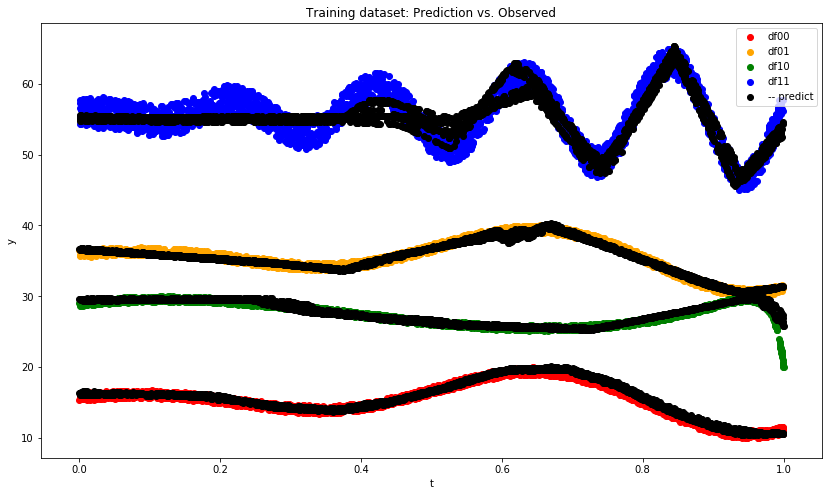

In [61]:
y_predict2 = model2.predict(x2)

plt.figure(figsize=(14, 8))
plt.scatter(df00['t'], df00['y'], color="red")
plt.scatter(df01['t'], df01['y'], color="orange")
plt.scatter(df10['t'], df10['y'], color="green")
plt.scatter(df11['t'], df11['y'], color="blue")

plt.scatter(df['t'], y_predict2, color="black")
plt.title('Training dataset: Prediction vs. Observed')
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['df00', 'df01', 'df10', 'df11', '-- predict'], loc=1)
plt.show()

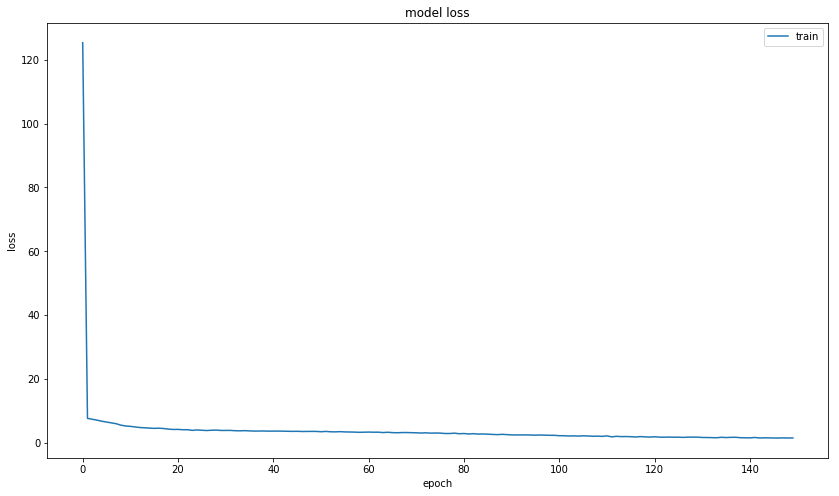

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(model_fitted.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()